# Capstone Project
## Segment the audience of a content app based on its user’s propensity to watch a video in the next 2 days

### Index
- [Package Imports](#package-imports)
- EDA
    - [EDA for AppInstalled Dataset](#eda-app-installed)
    - [EDA for AppUninstalled Dataset](#eda-app-uninstalled)
    - [EDA for Registration Dataset](#registration)
    - [EDA for UTMVisited Dataset](#eda-utm-visited)
    - [EDA for VideoDetails Dataset](#eda-video-details)
    - [EDA for VideoStarted Dataset](#eda-video-started)

<a id="package-imports"></a>
# Package Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

sns.set(style="darkgrid")

# <font color='black'>EDA for App Launched</font> 

In [2]:
df_applaunched = pd.read_csv("C://Users//DELL//Downloads//CLEVERTAP_SAJIB//Data//AppLaunched.csv")

In [3]:
list(df_applaunched)

['UserId',
 'Date',
 'Minute_Of_Day',
 'Second',
 'State',
 'Country',
 'Device',
 'OS']

[Text(0, 0, '1'), Text(0, 0, '40'), Text(0, 0, 'Unknown(255)')]

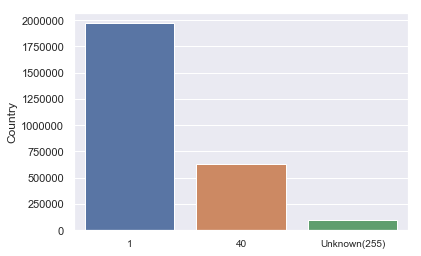

In [4]:
#Exploring the 'Country' column of AppLaunched Data.
df_applaunched_country = pd.DataFrame(df_applaunched['Country'].value_counts())
#Selecting only the country which have high counts of users launching the application
df_applaunched_country = df_applaunched_country[df_applaunched_country['Country']>50000]
#Visualizing using the bar plot
ax = sns.barplot(x=df_applaunched_country.index,y=df_applaunched_country['Country'])
ax.set_xticklabels(['1','40','Unknown(255)'], rotation='horizontal', fontsize=10)

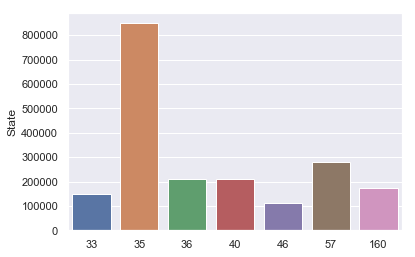

In [5]:
#Exploring the 'State' column of AppLaunched Data.
df_applaunched_state = pd.DataFrame(df_applaunched['State'].value_counts())
#Selecting only the states which have high counts of users launching the application
df_applaunched_state = df_applaunched_state[df_applaunched_state['State']>100000]
#Visualizing using the bar plot
ax = sns.barplot(x=df_applaunched_state.index,y=df_applaunched_state['State'])

[Text(0, 0, 'Desktop(0)'),
 Text(0, 0, 'Mobile(1)'),
 Text(0, 0, 'Tablet(2)'),
 Text(0, 0, 'TV(3)')]

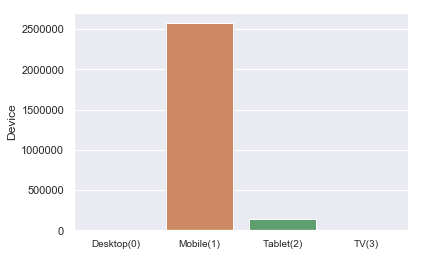

In [6]:
#Exploring the 'Device' column of AppLaunched Data.
df_applaunched_device = pd.DataFrame(df_applaunched['Device'].value_counts())
#Selecting only the devices which have high counts of users launching the application
df_applaunched_device = df_applaunched_device[df_applaunched_device['Device']>0]
#Visualizing using the bar plot
ax = sns.barplot(x=df_applaunched_device.index,y=df_applaunched_device['Device'])
ax.set_xticklabels(['Desktop(0)','Mobile(1)','Tablet(2)','TV(3)'], rotation='horizontal', fontsize=10)

[Text(0, 0, 'Others(0)'), Text(0, 0, 'Android(1)'), Text(0, 0, 'iOS(2)')]

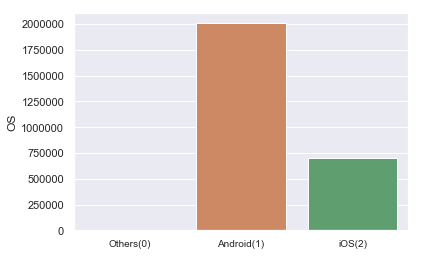

In [7]:
#Exploring the 'OS' column of AppLaunched Data.
df_applaunched_OS = pd.DataFrame(df_applaunched['OS'].value_counts())
#Selecting only the devices which have high counts of users launching the application
df_applaunched_OS = df_applaunched_OS[df_applaunched_OS['OS']>0]
#Visualizing using the bar plot
ax = sns.barplot(x=df_applaunched_OS.index,y=df_applaunched_OS['OS'])
ax.set_xticklabels(['Others(0)','Android(1)','iOS(2)'], rotation='horizontal', fontsize=10)

In [8]:
#Starting with date & time of day columns of AppLaunched data
#Splitting the date column into month & day
df_applaunched['Date'] = pd.to_datetime(df_applaunched['Date'],format="%Y%m%d")
df_applaunched['month'] = df_applaunched['Date'].dt.strftime('%b')
df_applaunched['day_of_month']= df_applaunched['Date'].dt.day

In [9]:
df_applaunched.head()

,UserId,Date,Minute_Of_Day,Second,State,Country,Device,OS,month,day_of_month
0,a27134c322d4f56dabc106a6847cb96b,2017-01-06,0,4,50,1,1,2,Jan,6
1,aab39ad0874c59cc388525d511667f9d,2017-01-06,0,8,40,1,1,2,Jan,6
2,f717dc3f757dc18cc0c3f27ed3e94ef8,2017-01-06,0,12,35,1,1,2,Jan,6
3,04c1e14fd54a06c0d4fe98cf0cb8b04c,2017-01-06,0,20,40,1,2,2,Jan,6
4,71f05822bb699a04b694dd30265fdf73,2017-01-06,0,20,35,1,1,2,Jan,6


In [10]:
#Grouping by month & day, aggregating based on count for each day of each month
df_groupedby_month_and_day = df_applaunched.groupby(by=['month','day_of_month']).count().reset_index()

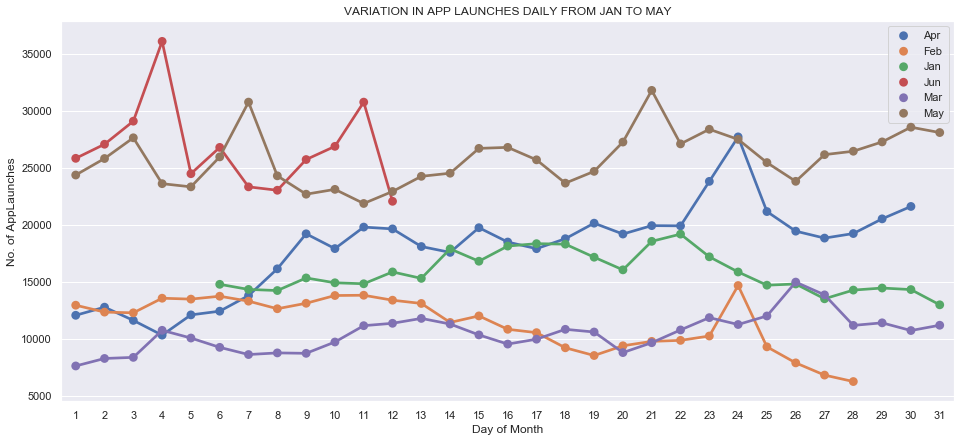

In [11]:
#Plotting the stacked line chart for each month
plt.figure(figsize=(16, 7))
sns.pointplot(x="day_of_month", y="UserId", hue="month", data=df_groupedby_month_and_day)
plt.xlabel("Day of Month")
plt.ylabel("No. of AppLaunches")
plt.title("VARIATION IN APP LAUNCHES DAILY FROM JAN TO MAY")
plt.legend(loc='upper right')

# Timestamp conversion for App Uninstalled Dataset

In [11]:
df_applaunched['TimeStamp']= df_applaunched["Date"].astype(str)+" "+(df_applaunched['Minute_Of_Day']//60).astype(str) +":"+ (df_applaunched['Minute_Of_Day']%60).astype(str)+ ":"+df_applaunched["Second"].astype(str)

In [12]:
df_applaunched['TimeStamp']=pd.to_datetime(df_applaunched["TimeStamp"],format="%Y%m%d %H:%M:%S")
df_applaunched["TimeStamp"].head()

0   2017-01-06 00:00:04
1   2017-01-06 00:00:08
2   2017-01-06 00:00:12
3   2017-01-06 00:00:20
4   2017-01-06 00:00:20
Name: TimeStamp, dtype: datetime64[ns]

<a id="eda-app-uninstalled"></a>
# EDA for App Uninstalled

In [12]:
app_uninstalled_df = pd.read_csv("C://Users//DELL//Downloads//CLEVERTAP_SAJIB//Data//Appuninstalled.csv")

In [13]:
app_uninstalled_df["UserId"].value_counts().head()

93d087d8b7df56f94b963367c640d557    41
64baef3964258bdead9ed9e4a1df84dc    31
ebaed4942c8e92e124afbad8720e7021    20
00777fb8db3ca4b63736934f698d905e    19
931edc94a53bddd1ad54759242b6c19c    18
Name: UserId, dtype: int64

In [14]:
app_uninstalled_df["Date"].value_counts().head()

20170122    3288
20170605    3265
20170607    3160
20170522    3065
20170124    3059
Name: Date, dtype: int64

In [15]:
app_uninstalled_df["Minute_Of_Day"].value_counts().head()

178    9922
132    9440
174    9315
142    9090
124    8141
Name: Minute_Of_Day, dtype: int64

In [16]:
app_uninstalled_df["Second"].value_counts()

0    326684
Name: Second, dtype: int64

In [17]:
app_uninstalled_df["State"].value_counts().head()

35     81285
0      37630
40     25018
57     24382
160    24070
Name: State, dtype: int64

In [18]:
app_uninstalled_df["Country"].value_counts().head()

1      196884
40      88374
255     37425
14       1950
2         737
Name: Country, dtype: int64

In [19]:
app_uninstalled_df["Device"].value_counts()

1    308815
2     16025
0      1696
3       148
Name: Device, dtype: int64

In [20]:
app_uninstalled_df["OS"].value_counts()

1    310736
2     14618
0      1330
Name: OS, dtype: int64

In [21]:
app_uninstalled_df.dtypes

UserId           object
Date              int64
Minute_Of_Day     int64
Second            int64
State             int64
Country           int64
Device            int64
OS                int64
dtype: object

In [ ]:
# Check for 0s in numerical columns

In [22]:
numeric_df = app_uninstalled_df._get_numeric_data()
numeric_df_is_zero = numeric_df.isin([0])

In [23]:
for column in numeric_df_is_zero.columns:
    print(column)
    print(numeric_df_is_zero[column].value_counts())
    print('________________________________')

Date
False    326684
Name: Date, dtype: int64
________________________________
Minute_Of_Day
False    326612
True         72
Name: Minute_Of_Day, dtype: int64
________________________________
Second
True    326684
Name: Second, dtype: int64
________________________________
State
False    289054
True      37630
Name: State, dtype: int64
________________________________
Country
False    326489
True        195
Name: Country, dtype: int64
________________________________
Device
False    324988
True       1696
Name: Device, dtype: int64
________________________________
OS
False    325354
True       1330
Name: OS, dtype: int64
________________________________


In [24]:
app_uninstalled_df.describe()

,Date,Minute_Of_Day,Second,State,Country,Device,OS
count,3.266840e+05,326684.000000,326684.0,326684.000000,326684.000000,326684.000000,326684.000000
mean,2.017035e+07,357.310704,0.0,41.461327,40.816655,1.044768,1.040675
std,1.648711e+02,401.987829,0.0,37.381092,78.878149,0.232493,0.217172
min,2.017011e+07,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,2.017021e+07,138.000000,0.0,33.000000,1.000000,1.000000,1.000000
50%,2.017040e+07,157.000000,0.0,35.000000,1.000000,1.000000,1.000000
75%,2.017051e+07,178.000000,0.0,43.000000,40.000000,1.000000,1.000000
max,2.017061e+07,1439.000000,0.0,252.000000,255.000000,3.000000,2.000000


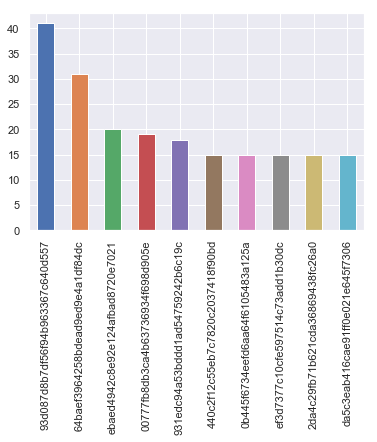

In [25]:
app_uninstalled_df["UserId"].value_counts().nlargest(10).plot(kind = "bar")

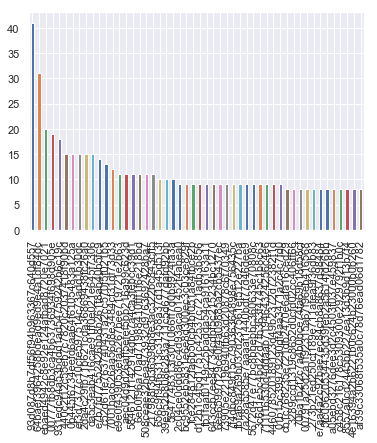

In [26]:
app_uninstalled_df["UserId"].value_counts().nlargest(50).plot(kind = "bar")

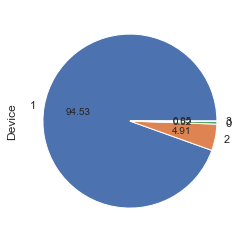

In [27]:
app_uninstalled_df["Device"].value_counts().plot.pie(autopct="%.2f")

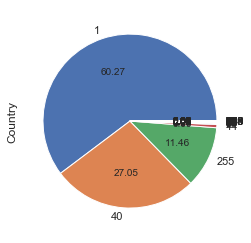

In [28]:
app_uninstalled_df["Country"].value_counts().plot.pie(autopct="%.2f")

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


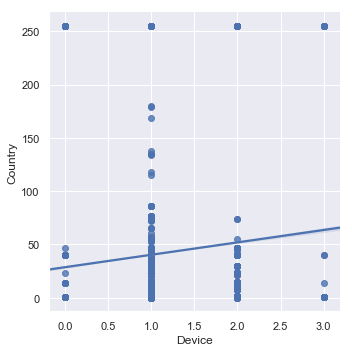

In [31]:
g = sns.lmplot("Device","Country",app_uninstalled_df)

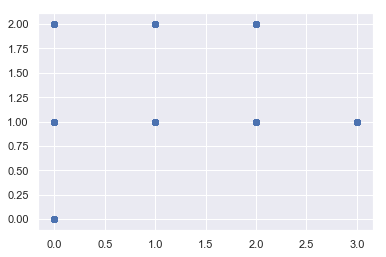

In [29]:
plt.scatter(app_uninstalled_df["Device"],app_uninstalled_df["OS"])

In [30]:
#Starting with date & time of day columns of AppLaunched data
#Splitting the date column into month & day
app_uninstalled_df['Date'] = pd.to_datetime(app_uninstalled_df['Date'],format="%Y%m%d")
app_uninstalled_df['month'] = app_uninstalled_df['Date'].dt.strftime('%b')
app_uninstalled_df['day_of_month']= app_uninstalled_df['Date'].dt.day

In [31]:
#Grouping by month & day, aggregating based on count for each day of each month
df_groupedby_month_and_day = app_uninstalled_df.groupby(by=['month','day_of_month']).count().reset_index()

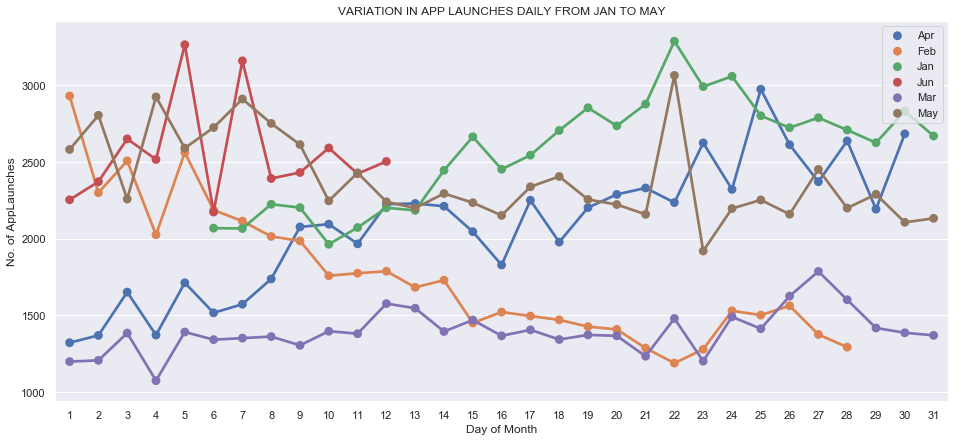

In [32]:
#Plotting the stacked line chart for each month
plt.figure(figsize=(16, 7))
sns.pointplot(x="day_of_month", y="UserId", hue="month", data=df_groupedby_month_and_day)
plt.xlabel("Day of Month")
plt.ylabel("No. of AppLaunches")
plt.title("VARIATION IN APP LAUNCHES DAILY FROM JAN TO MAY")
plt.legend(loc='upper right')

# Timestamp conversion for App Uninstalled Dataset

In [32]:
app_uninstalled_df['TimeStamp']= app_uninstalled_df["Date"].astype(str)+" "+(app_uninstalled_df['Minute_Of_Day']//60).astype(str) +":"+ (app_uninstalled_df['Minute_Of_Day']%60).astype(str)+ ":"+app_uninstalled_df["Second"].astype(str)

In [33]:
app_uninstalled_df['TimeStamp']=pd.to_datetime(app_uninstalled_df["TimeStamp"],format="%Y%m%d %H:%M:%S")
app_uninstalled_df["TimeStamp"].head()

0   2017-01-06 00:00:00
1   2017-01-06 00:00:00
2   2017-01-06 00:01:00
3   2017-01-06 00:01:00
4   2017-01-06 00:06:00
Name: TimeStamp, dtype: datetime64[ns]

<a id="registration"></a>
# EDA for Registration

In [49]:
registration_df = pd.read_csv("C://Users//DELL//Downloads//CLEVERTAP_SAJIB//Data//Registration.csv")

In [50]:
registration_df.head()

,UserId,Date,Minute_Of_Day,Second,State,Country,Device,OS,Status
0,d168e2b924124feaad13eae44a68fce9,20170106,0,8,35,1,1,2,Complete
1,deed7490952a6746610ee2ee9fd219b7,20170106,0,8,7,40,1,1,Completed
2,13d9f55e297d7d9c219fbe9085e1006c,20170106,0,28,35,1,1,2,Complete
3,fccc2c0abf5afabf242a70df7b4c9e69,20170106,0,52,39,1,1,1,Completed
4,9ff982b29d78cefc8eb5a3ffb7fd2a5d,20170106,0,52,38,1,1,1,Not Completed


In [51]:
print('=====================================================')
print('Registration details')
print('=====================================================')
print ('User data has {} rows and {} columns'.format(registration_df.shape[0],registration_df.shape[1]))
print ('Number of Unique Users registered = {} '.format(registration_df['UserId'].nunique()))
print ('Number of Unique Countries user registered from = {} '.format(registration_df['Country'].nunique()))
print ('Number of States user registered from = {} '.format(registration_df['State'].nunique()))
print ('Number of Device user registered from = {} '.format(registration_df['Device'].nunique()))
print ('Number of OS used for registration = {} '.format(registration_df['OS'].nunique()))
print ('Minium date of registration = {} '.format(registration_df['Date'].min()))
print ('Maximum date of registration = {} '.format(registration_df['Date'].max()))
print('=====================================================')



Registration details
User data has 329579 rows and 9 columns
Number of Unique Users registered = 259318 
Number of Unique Countries user registered from = 30 
Number of States user registered from = 102 
Number of Device user registered from = 4 
Number of OS used for registration = 3 
Minium date of registration = 20170106 
Maximum date of registration = 20170612 


In [52]:
registration_df.shape

(329579, 9)

In [53]:
columns_for_describing = [
    'Date',
    'Minute_Of_Day',
    'Second'
]

registration_df[columns_for_describing].describe()

,Date,Minute_Of_Day,Second
count,3.295790e+05,329579.000000,329579.000000
mean,2.017039e+07,859.484913,27.907603
std,1.517299e+02,381.084623,17.306101
min,2.017011e+07,0.000000,0.000000
25%,2.017031e+07,612.000000,12.000000
50%,2.017042e+07,899.000000,28.000000
75%,2.017052e+07,1180.000000,44.000000
max,2.017061e+07,1439.000000,56.000000


In [54]:
# Merge Complete and Completed status together
registration_df = registration_df.replace('Complete', 'Completed')

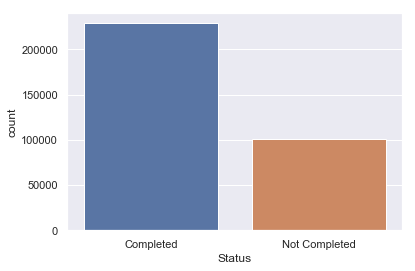

In [55]:
# Total number of users registered in Clevertap

sns.countplot(x='Status',data=registration_df)

In [56]:
columns_for_value_counts = [
    'UserId',
    'Country',
    'Device',
    'OS',
    'Status',
    'State'
]

for column in columns_for_value_counts:
    print('==========================================================')
    print('Column: ' + column)
    print(registration_df[column].value_counts())

Column: UserId
8bbb1c03eae7ff6d8523dda861e27045    546
b2c763b19151732ccdc108a790ed273f     65
6bfd2ce12162d39c635b9df4b42c874a     47
40cc9472bdaf0d4df83a51d93c20aca1     43
f6f20d83c94c124c4790454593fd4c96     43
c519adb3903b3d83c46dcf05a9db441a     43
757e76a31d57178a42cc0157e6c32048     42
0fdf99107000dc0e2084a8668d8acb28     34
5b3d76d28925459f99dc05526168a374     34
d3f60900ea03d43c009089da47d73898     29
2dead7dd1caac504a9310b459c83d3bc     27
608a1ad851a9fc9113c7cba938b3741b     27
c43173689a9a5da27d09beed18979e73     25
befe5a9cd11684824f9763a9fc755075     24
239644e1f91fadba5a21d3fa9ec83e28     23
48785888a2593da8b98daade1d2ecd54     22
7c0599c69d9451af9401055717d26f22     22
ca630d146604b80d461827f85ed059e9     22
c9d4b265dfaf29aa2bd7d165c2261ac7     21
5158897d35b65b6d401e4d46d91d43dc     21
379822aae47fe301c7b8f6bdb6658063     20
d6e387358065d6f7dea5676b6456a1f1     20
32bfcd15d79a2ae376085dd15f76cee1     19
4c5806735d29492c2226c9a711d4b1c8     19
3a60c53ee1a2edcd8f66a331a

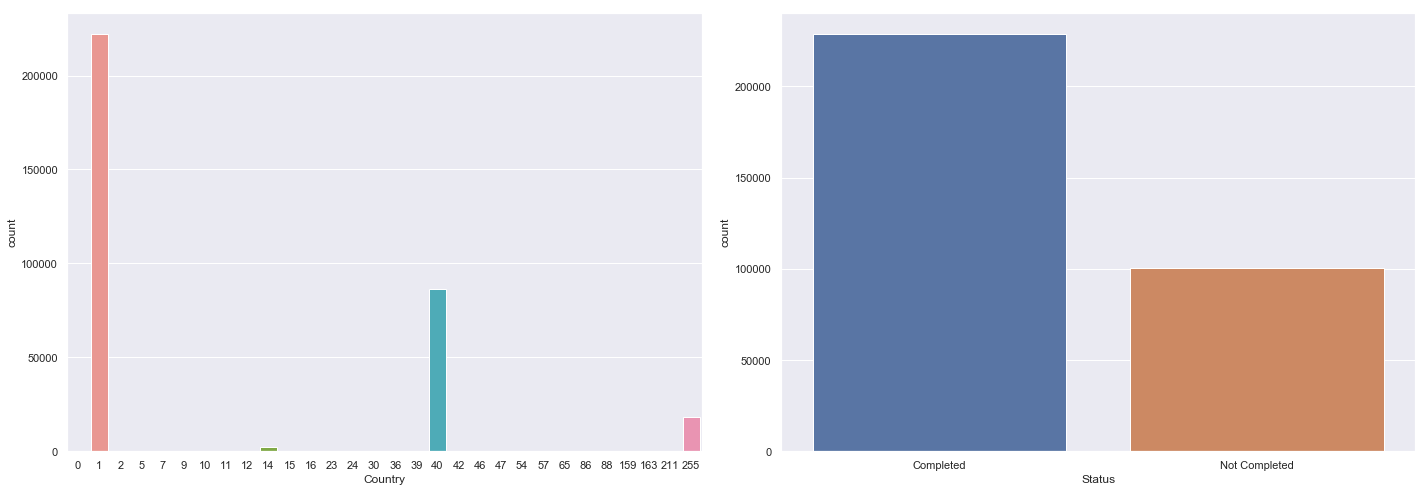

In [57]:
num_cols = ['Country', 'Status']


for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(20,7))
        plt.subplot(121)
        sns.countplot(num_cols[i],data = registration_df)
        plt.subplot(122)            
        sns.countplot(num_cols[i+1],data = registration_df)
        plt.tight_layout()
        plt.show()

    else:
        sns.countplot(num_cols[i],data = registration_df)

[Text(0, 0, 'Desktop(0)'),
 Text(0, 0, 'Mobile(1)'),
 Text(0, 0, 'Tablet(2)'),
 Text(0, 0, 'TV(3)')]

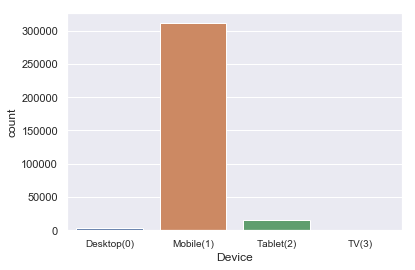

In [58]:
ax = sns.countplot('Device',data = registration_df)
ax.set_xticklabels(['Desktop(0)','Mobile(1)','Tablet(2)','TV(3)'], rotation='horizontal', fontsize=10)

# Which device is most used for registration

In [59]:
registration_df.groupby('Device')['Status'].value_counts()

Device  Status       
0       Completed          2674
        Not Completed        68
1       Completed        215621
        Not Completed     95538
2       Completed         10563
        Not Completed      4946
3       Completed           113
        Not Completed        56
Name: Status, dtype: int64

[Text(0, 0, 'Others(0)'), Text(0, 0, 'Android(1)'), Text(0, 0, 'iOS(2)')]

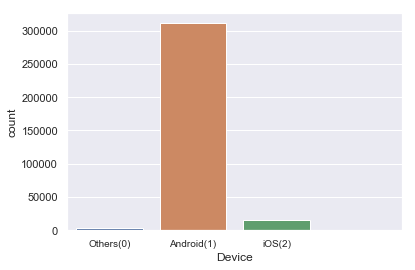

In [60]:
ax = sns.countplot('Device',data = registration_df)
ax.set_xticklabels(['Others(0)','Android(1)','iOS(2)'], rotation='horizontal', fontsize=10)

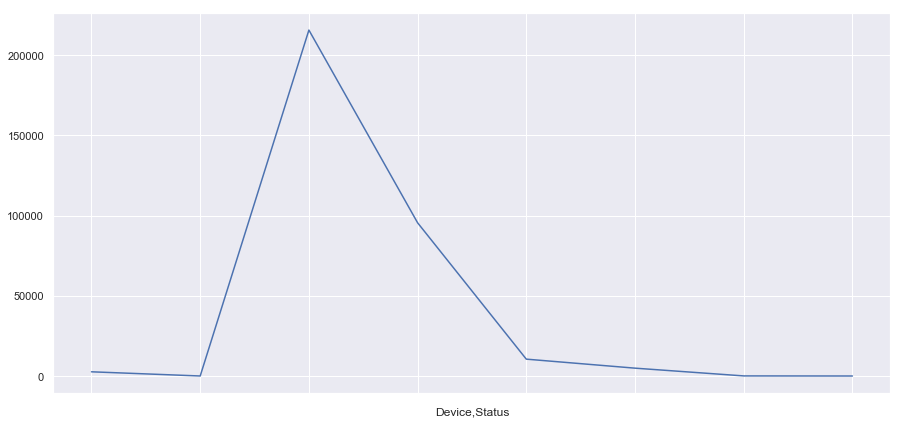

In [61]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
registration_df.groupby('Device')['Status'].value_counts().plot(ax=ax)


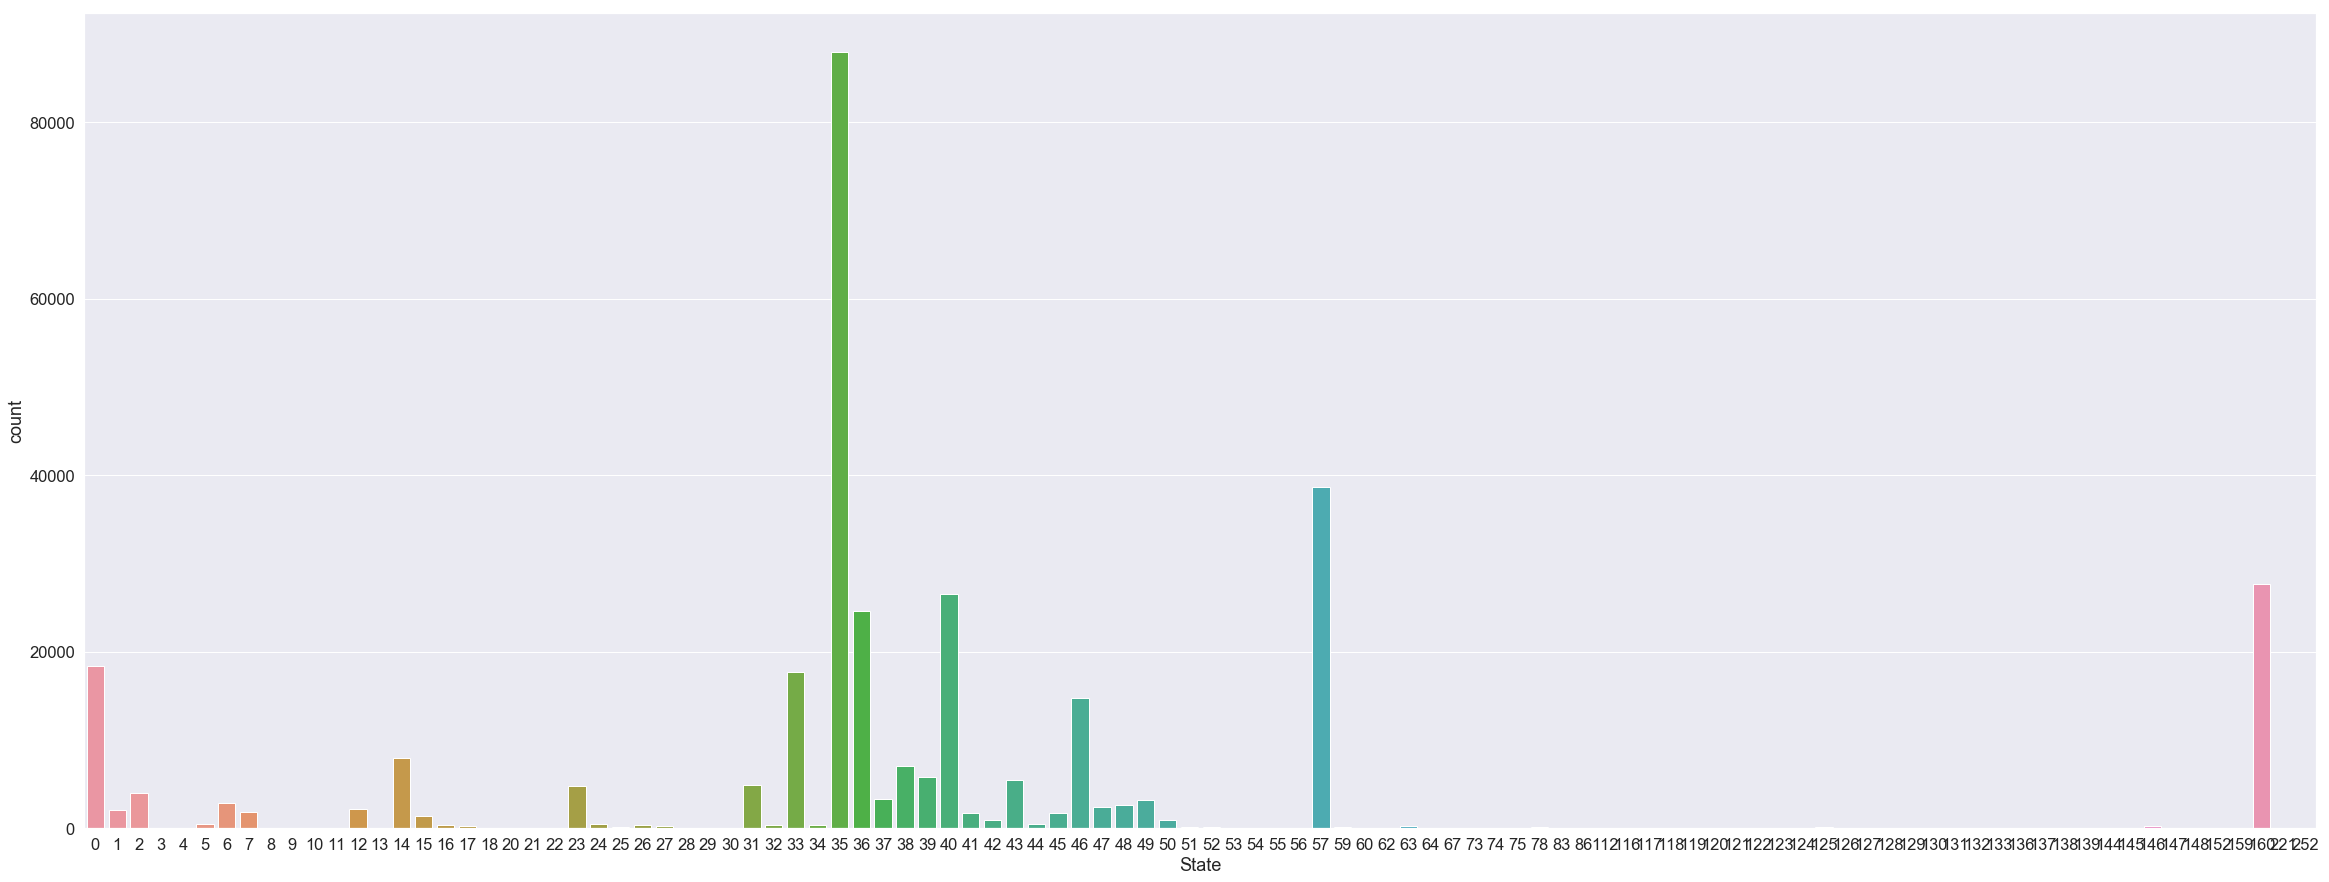

In [46]:
plt.figure(figsize=(40,15))
sns.set(font_scale = 1.5)
sns.countplot('State',data = registration_df, )

In [47]:
registration_df['UserId'].value_counts().describe()

count    259318.000000
mean          1.270945
std           1.357468
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         546.000000
Name: UserId, dtype: float64

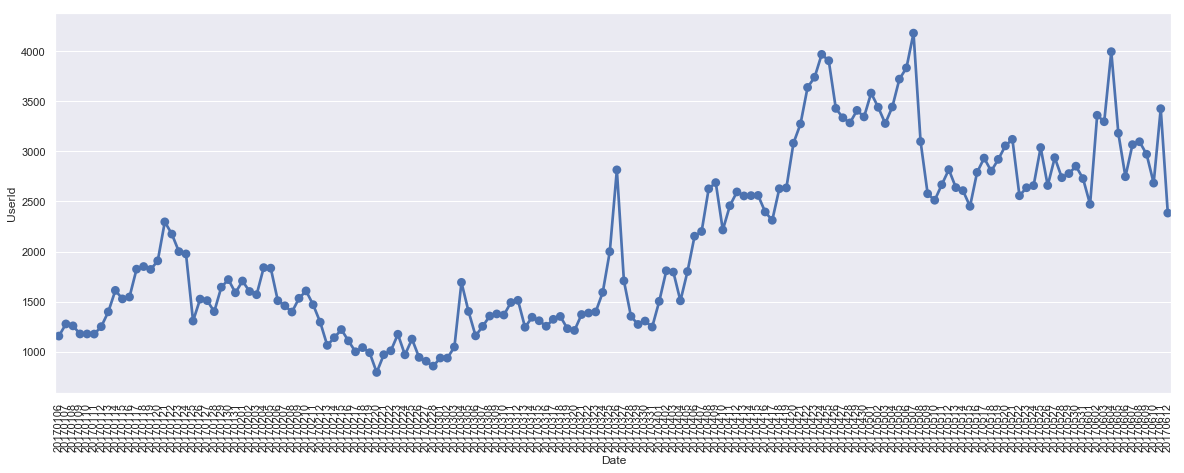

In [48]:
forcasting_df = registration_df.groupby('Date').count()
forcasting_df = forcasting_df.reset_index()
plt.figure(figsize=(20,7))
sns.set(font_scale = 1)
plt.xticks(rotation=90);
ax = sns.pointplot(x = forcasting_df.Date, y = forcasting_df.UserId, label='Release Count')

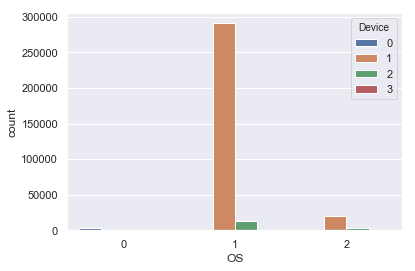

In [53]:
sns.countplot(x='OS', hue='Device', data=registration_df)

# Which country has the most registrations

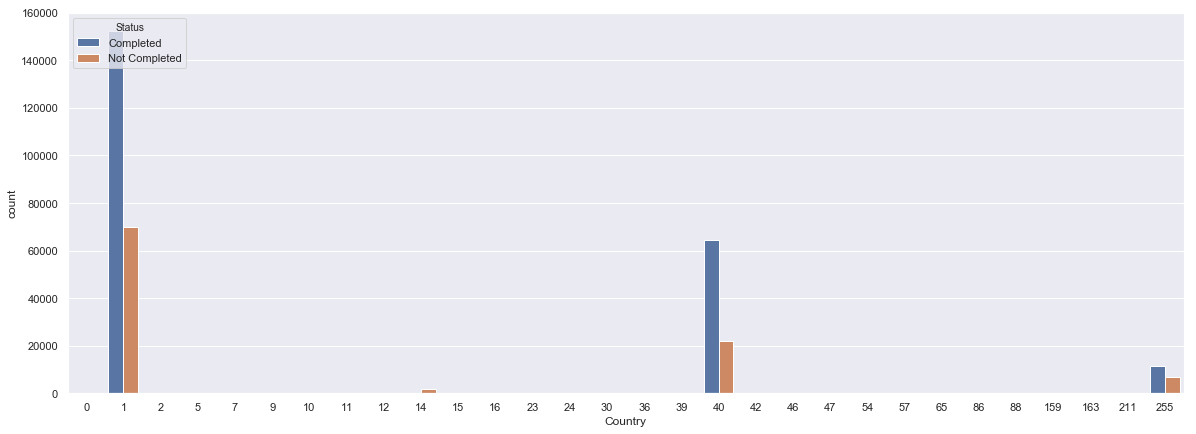

In [54]:
plt.figure(figsize=(20,7))
sns.countplot(x='Country', hue='Status', data=registration_df)

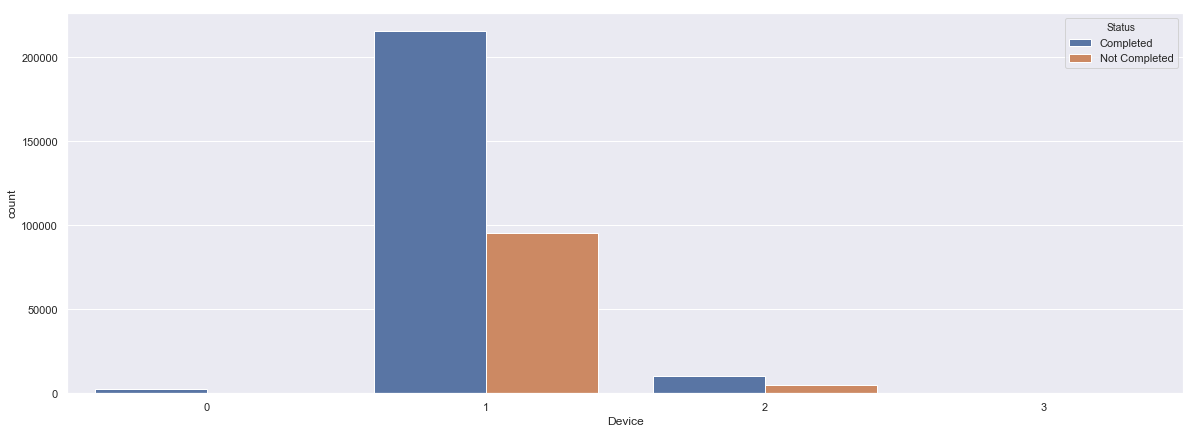

In [55]:
plt.figure(figsize=(20,7))
sns.countplot(x='Device', hue='Status', data=registration_df)

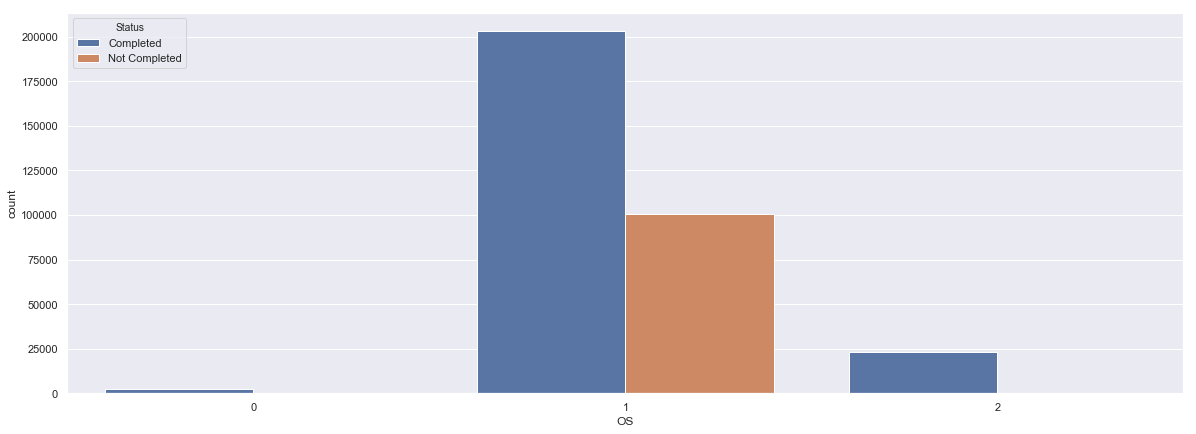

In [56]:
plt.figure(figsize=(20,7))
sns.countplot(x='OS', hue='Status', data=registration_df)

In [57]:
#Starting with date & time of day columns of AppLaunched data
#Splitting the date column into month & day
registration_df['Date'] = pd.to_datetime(registration_df['Date'],format="%Y%m%d")
registration_df['month'] = registration_df['Date'].dt.strftime('%b')
registration_df['day_of_month']= registration_df['Date'].dt.day

In [58]:
#Grouping by month & day, aggregating based on count for each day of each month
df_groupedby_month_and_day = registration_df.groupby(by=['month','day_of_month']).count().reset_index()

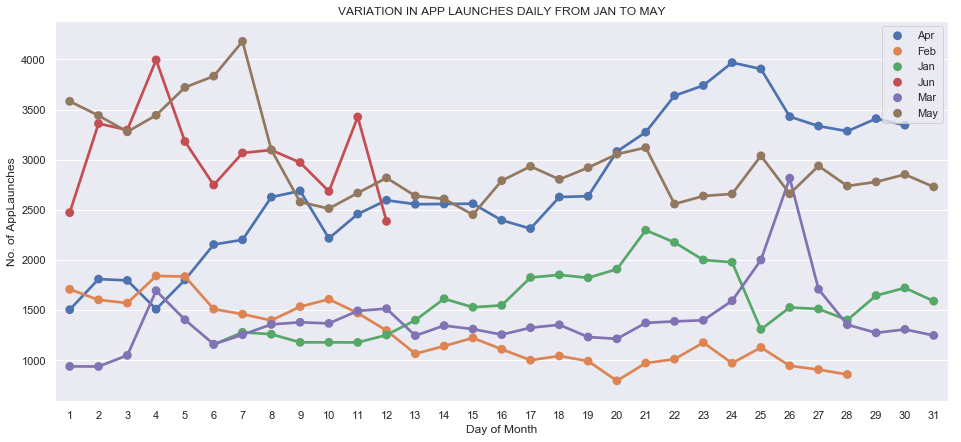

In [59]:
#Plotting the stacked line chart for each month
plt.figure(figsize=(16, 7))
sns.pointplot(x="day_of_month", y="UserId", hue="month", data=df_groupedby_month_and_day)
plt.xlabel("Day of Month")
plt.ylabel("No. of AppLaunches")
plt.title("VARIATION IN APP LAUNCHES DAILY FROM JAN TO MAY")
plt.legend(loc='upper right')

# Timestamp conversion for Registration

In [54]:
registration_df['TimeStamp']= registration_df["Date"].astype(str)+" "+(registration_df['Minute_Of_Day']//60).astype(str) +":"+ (registration_df['Minute_Of_Day']%60).astype(str)+ ":"+registration_df["Second"].astype(str)

In [55]:
registration_df['TimeStamp']=pd.to_datetime(registration_df["TimeStamp"],format="%Y%m%d %H:%M:%S")
registration_df["TimeStamp"].head()

0   2017-01-06 00:00:08
1   2017-01-06 00:00:08
2   2017-01-06 00:00:28
3   2017-01-06 00:00:52
4   2017-01-06 00:00:52
Name: TimeStamp, dtype: datetime64[ns]

In [56]:
registration_df.head()

,UserId,Date,Minute_Of_Day,Second,State,Country,Device,OS,Status,TimeStamp
0,d168e2b924124feaad13eae44a68fce9,20170106,0,8,35,1,1,2,Completed,2017-01-06 00:00:08
1,deed7490952a6746610ee2ee9fd219b7,20170106,0,8,7,40,1,1,Completed,2017-01-06 00:00:08
2,13d9f55e297d7d9c219fbe9085e1006c,20170106,0,28,35,1,1,2,Completed,2017-01-06 00:00:28
3,fccc2c0abf5afabf242a70df7b4c9e69,20170106,0,52,39,1,1,1,Completed,2017-01-06 00:00:52
4,9ff982b29d78cefc8eb5a3ffb7fd2a5d,20170106,0,52,38,1,1,1,Not Completed,2017-01-06 00:00:52


<a id="eda-utm-visited"></a>
# EDA for UTM Visited

In [60]:
#read the csv file into pandas dataframe
import pandas as pd
import seaborn as sns
UTM_Visited_df = pd.read_csv("C://Users//DELL//Downloads//CLEVERTAP_SAJIB//Data//UTMVisited.csv")

In [61]:
#view the first 5 rows of the dataset
UTM_Visited_df.head()

,UserId,Date,Minute_Of_Day,Second,State,Country,Device,OS
0,66d4abf4f3b733c27591b3f47c85eff7,20170106,0,52,37,1,1,1
1,1a40d7e5b34131b097fac80cf982241b,20170106,0,56,40,1,1,1
2,b7b3c1ce773a13b52d39429e305ea615,20170106,1,16,35,1,1,1
3,3f486a89433a02b96ab13b16c82e39fd,20170106,1,32,35,1,1,1
4,9ff982b29d78cefc8eb5a3ffb7fd2a5d,20170106,1,32,38,1,1,1


In [62]:
#view the number of rows and columns in the dataset
UTM_Visited_df.shape

(495850, 8)

In [63]:
#view the datatypes of the columns in the dataset
UTM_Visited_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495850 entries, 0 to 495849
Data columns (total 8 columns):
UserId           495850 non-null object
Date             495850 non-null int64
Minute_Of_Day    495850 non-null int64
Second           495850 non-null int64
State            495850 non-null int64
Country          495850 non-null int64
Device           495850 non-null int64
OS               495850 non-null int64
dtypes: int64(7), object(1)
memory usage: 30.3+ MB


In [64]:
#check for the number of missing values
UTM_Visited_df.isnull().sum()

UserId           0
Date             0
Minute_Of_Day    0
Second           0
State            0
Country          0
Device           0
OS               0
dtype: int64

In [65]:
##view the value counts of the Country column
UTM_Visited_df["Country"].value_counts()

1      324892
40     139172
255     28337
14       1836
2         555
30        160
12        140
0         127
47         96
15         89
7          72
23         54
5          51
10         47
46         39
11         26
24         25
34         19
21         19
73         11
57         10
16         10
77          7
54          6
32          6
39          5
6           5
20          4
86          4
44          3
163         3
135         2
36          2
179         2
42          2
65          2
25          1
72          1
115         1
134         1
45          1
52          1
61          1
4           1
62          1
29          1
Name: Country, dtype: int64

In [66]:
#view the value counts of the OS column
UTM_Visited_df["OS"].value_counts()

1    483461
2     12338
0        51
Name: OS, dtype: int64

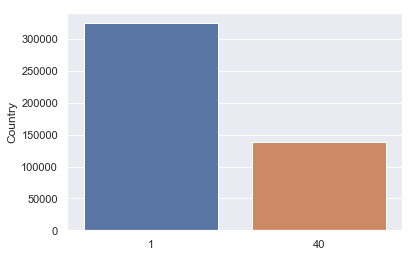

In [67]:
#Exploring the 'Country' column of UTM Visited Data.
UTM_Visited_df_country = pd.DataFrame(UTM_Visited_df['Country'].value_counts())
#Selecting only the country which have high counts of users in UTM visited
UTM_Visited_df_country = UTM_Visited_df_country[UTM_Visited_df_country['Country']>50000]
#Visualizing using the bar plot
ax = sns.barplot(x=UTM_Visited_df_country.index,y=UTM_Visited_df_country['Country'])

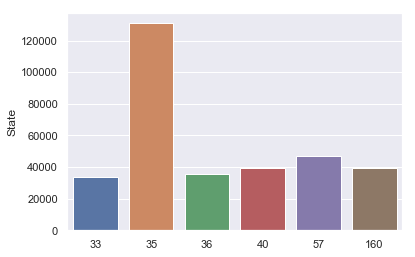

In [68]:
#Exploring the 'State' column of UTM Visited Data.
UTM_Visited_df_state = pd.DataFrame(UTM_Visited_df['State'].value_counts())
#Selecting only the state which have high counts of users in UTM visited
UTM_Visited_df_state = UTM_Visited_df_state[UTM_Visited_df_state['State']>30000]
#Visualizing using the bar plot
ax = sns.barplot(x=UTM_Visited_df_state.index,y=UTM_Visited_df_state['State'])

In [69]:
##view the value counts of the State column
UTM_Visited_df["State"].value_counts()

35     130943
57      46993
40      39612
160     39429
36      35398
33      33565
0       28472
46      22249
38      12957
14      12261
39       9189
31       8551
2        8537
43       7992
23       7738
48       6181
37       5543
47       4350
49       4081
6        4022
7        3462
12       2871
15       2439
45       2432
41       2055
1        1884
50       1540
42       1142
32        885
5         846
        ...  
130        11
252        11
60          9
120         9
21          9
117         8
112         7
147         6
149         5
83          5
144         4
64          4
139         4
221         3
76          3
85          3
61          3
30          3
19          3
118         3
136         3
127         3
66          2
101         2
140         1
116         1
79          1
145         1
132         1
152         1
Name: State, Length: 111, dtype: int64

[Text(0, 0, '0(Desktop)'),
 Text(0, 0, '1(Mobile)'),
 Text(0, 0, '2(Tablet)'),
 Text(0, 0, '3(TV)')]

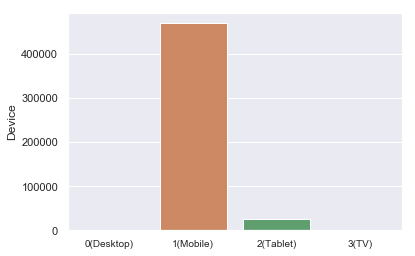

In [70]:
#Exploring the 'Device' column of UTM Visited Data.
UTM_Visited_df_device = pd.DataFrame(UTM_Visited_df['Device'].value_counts())
#Visualizing using the bar plot
ax = sns.barplot(x=UTM_Visited_df_device.index,y=UTM_Visited_df_device['Device'])
ax.set_xticklabels(['0(Desktop)','1(Mobile)','2(Tablet)','3(TV)'], rotation='horizontal', fontsize=10)

[Text(0, 0, '0: Others'), Text(0, 0, '1: Android'), Text(0, 0, '2: iOS')]

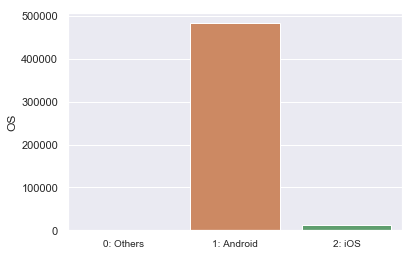

In [71]:
#Exploring the 'OS' column of UTM Visited Data.
UTM_Visited_df_OS = pd.DataFrame(UTM_Visited_df['OS'].value_counts())
#Visualizing using the bar plot
ax = sns.barplot(x=UTM_Visited_df_OS.index,y=UTM_Visited_df_OS['OS'])
ax.set_xticklabels(['0: Others', '1: Android', '2: iOS', '3: Windows','4: Mac', '5: BlackBerry', '6: Linux'], rotation='horizontal', fontsize=10)

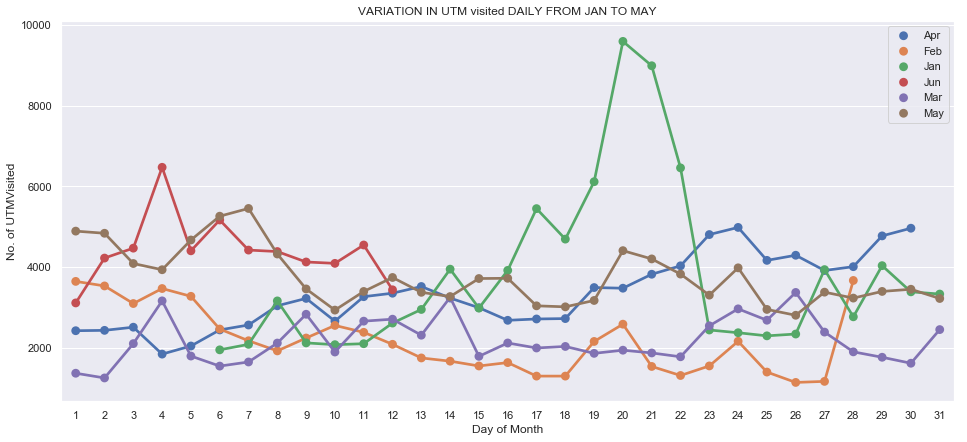

In [72]:
import seaborn as sns
UTM_Visited_df['Date'] = pd.to_datetime(UTM_Visited_df['Date'],format="%Y%m%d")
UTM_Visited_df['month'] = UTM_Visited_df['Date'].dt.strftime('%b')
UTM_Visited_df['day_of_month']= UTM_Visited_df['Date'].dt.day

#Grouping by month & day, aggregating based on count of users for each day of each month
df_groupedby_month_and_day = UTM_Visited_df.groupby(by=['month','day_of_month']).count().reset_index()


#Plotting the stacked line chart for each day of each month
plt.figure(figsize=(16, 7))
sns.pointplot(x="day_of_month", y="UserId", hue="month", data=df_groupedby_month_and_day)
plt.xlabel("Day of Month")
plt.ylabel("No. of UTMVisited")
plt.title("VARIATION IN UTM visited DAILY FROM JAN TO MAY")
plt.legend(loc='upper right')

# Timestamp conversion for UTM Visited

In [70]:
UTM_Visited_df['TimeStamp']= UTM_Visited_df["Date"].astype(str)+" "+(UTM_Visited_df['Minute_Of_Day']//60).astype(str) +":"+ (UTM_Visited_df['Minute_Of_Day']%60).astype(str)+ ":"+UTM_Visited_df["Second"].astype(str)

In [71]:
UTM_Visited_df['TimeStamp']=pd.to_datetime(UTM_Visited_df["TimeStamp"],format="%Y%m%d %H:%M:%S")
UTM_Visited_df["TimeStamp"].head()

0   2017-01-06 00:00:52
1   2017-01-06 00:00:56
2   2017-01-06 00:01:16
3   2017-01-06 00:01:32
4   2017-01-06 00:01:32
Name: TimeStamp, dtype: datetime64[ns]

<a id="eda-video-details"></a>
# EDA for Video Details

In [73]:
vid_det = pd.read_csv("C://Users//DELL//Downloads//CLEVERTAP_SAJIB//Data//VideoDetails.csv")

In [74]:
vid_det.head()

,UserId,Date,Minute_Of_Day,Second,State,Genre,Category,ProgramType,Country,Device,OS,VideoId
0,dc93d200565e5bf6e6fc55adb1c5ba06,20170106,0,4,35,Drama,vod,TV Shows,1,2,1,1f2dc23e0d2415353982cfa38cbaf983
1,12060efd8b68ea562b265d0129a8af1f,20170106,0,16,35,Horror,vod,Movies,1,1,1,6c95441f239cebf9930ac5932cc84a7f
2,9151ab2a901458f27e36548d4a8dc011,20170106,0,20,0,Drama,vod,TV Shows,255,1,1,1af000794c63fa2722e22af609ff572c
3,1faf0ce0b98e02e1568702f516f01a78,20170106,0,20,35,Drama,vod,TV Shows,1,1,1,f053c42e98d50e06532ce8d65afb3ab3
4,435d41ae019cb8db785483793859c9a8,20170106,0,20,35,Anime,vod,TV Shows,1,1,1,2a9d984659afc14f801548dd71ddad0e


In [75]:
print('=====================================================')
print('Video details')
print('=====================================================')
print ('Vide data has {} rows and {} columns'.format(vid_det.shape[0],vid_det.shape[1]))
print ('Number of Unique Users watching videos= {} '.format(vid_det['UserId'].nunique()))
print ('Number of Unique Genres = {} '.format(vid_det['Genre'].nunique()))
print ('Number of Unique Category = {} '.format(vid_det['Category'].nunique()))
print ('Number of Unique Program Type = {} '.format(vid_det['ProgramType'].nunique()))
print ('Number of OS used for videos = {} '.format(vid_det['OS'].nunique()))
print ('Number of Device used for videos = {} '.format(vid_det['Device'].nunique()))
print ('Number of Unique videos = {} '.format(vid_det['VideoId'].nunique()))
print('=====================================================')


Video details
Vide data has 3695451 rows and 12 columns
Number of Unique Users watching videos= 252030 
Number of Unique Genres = 53 
Number of Unique Category = 2 
Number of Unique Program Type = 4 
Number of OS used for videos = 3 
Number of Device used for videos = 4 
Number of Unique videos = 3856 


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020255AA3828>],
      dtype=object)

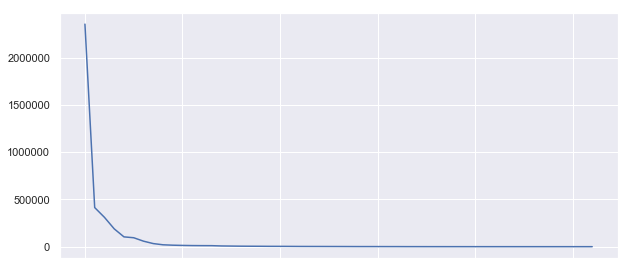

In [76]:
vid_det['Genre'].value_counts().plot(subplots=True, figsize=(10,5))


In [77]:
vid_det = vid_det[vid_det['ProgramType']!='  ']

In [78]:
vid_det['ProgramType'].value_counts()

 TV Shows     3117020
 Movies        398975
 Channels      179228
Name: ProgramType, dtype: int64

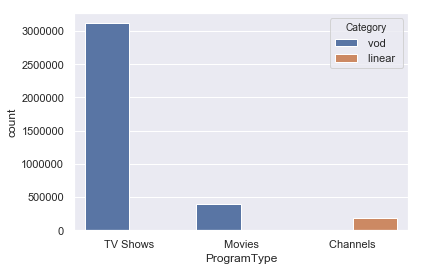

In [79]:
sns.countplot(x=vid_det['ProgramType'],hue=vid_det['Category'])

[Text(0, 0, 'Desktop'),
 Text(0, 0, 'Mobile'),
 Text(0, 0, 'Tablet'),
 Text(0, 0, 'TV')]

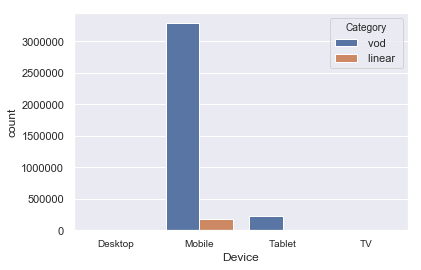

In [80]:
ax = sns.countplot(x=vid_det['Device'],hue=vid_det['Category'])
ax.set_xticklabels(['Desktop','Mobile','Tablet','TV'],rotation='horizontal',fontsize=10)

In [81]:
vid_det.OS.value_counts()

1    3124351
2     570770
0        102
Name: OS, dtype: int64

[Text(0, 0, 'Desktop'),
 Text(0, 0, 'Mobile'),
 Text(0, 0, 'Tablet'),
 Text(0, 0, 'TV')]

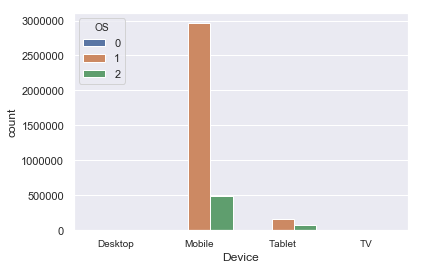

In [82]:
ax = sns.countplot(x=vid_det['Device'],hue=vid_det['OS'])
ax.set_xticklabels(['Desktop','Mobile','Tablet','TV'],rotation='horizontal',fontsize=10)


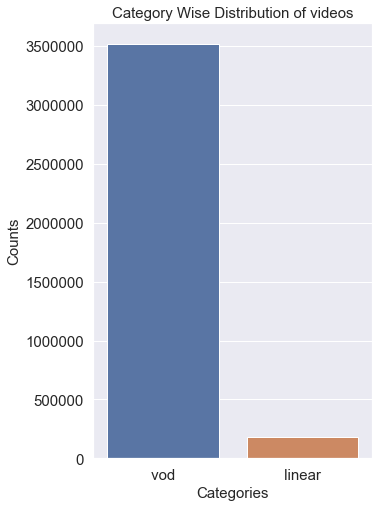

In [83]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 8)
sns.countplot(x = 'Category', data = vid_det)
ax.set_xlabel('Categories', fontsize=15)
ax.set_ylabel('Counts', fontsize=15)
ax.set_title('Category Wise Distribution of videos', fontsize=15)
ax.tick_params(labelsize=15)


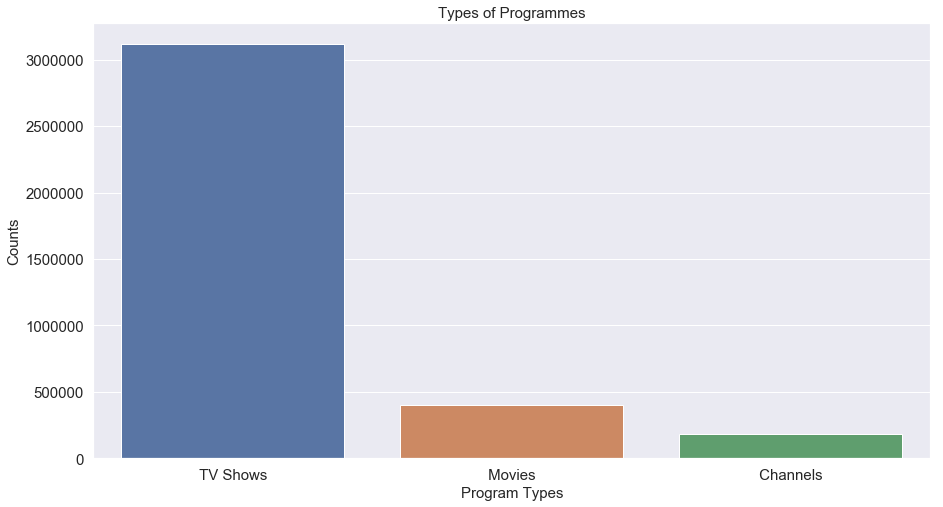

In [84]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.countplot(x = 'ProgramType', data = vid_det)
ax.set_xlabel('Program Types', fontsize=15)
ax.set_ylabel('Counts', fontsize=15)
ax.set_title('Types of Programmes', fontsize=15)
ax.tick_params(labelsize=15)


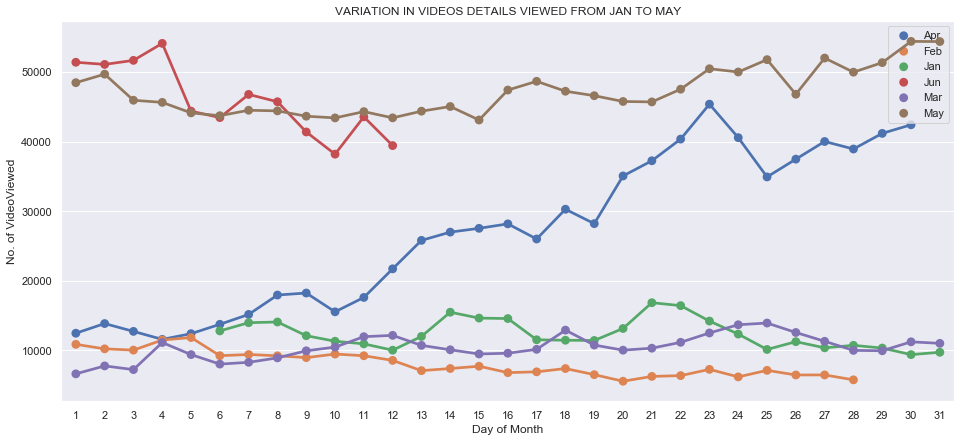

In [85]:
#Starting with date & time of day columns of VideoDetails data
#Splitting the date column into month & day
vid_det['Date'] = pd.to_datetime(vid_det['Date'],format="%Y%m%d")
vid_det['month'] = vid_det['Date'].dt.strftime('%b')
vid_det['day_of_month']= vid_det['Date'].dt.day

#Grouping by month & day, aggregating based on count of video details viewed for each day of each month
df_groupedby_month_and_day = vid_det.groupby(by=['month','day_of_month']).count().reset_index()

#Plotting the stacked line chart for each day of each month
plt.figure(figsize=(16, 7))
sns.pointplot(x="day_of_month", y="UserId", hue="month", data=df_groupedby_month_and_day)
plt.xlabel("Day of Month")
plt.ylabel("No. of VideoViewed")
plt.title("VARIATION IN VIDEOS DETAILS VIEWED FROM JAN TO MAY")
plt.legend(loc='upper right')

# Timestamp conversion for video details

In [89]:
vid_det['TimeStamp']= vid_det["Date"].astype(str)+" "+(vid_det['Minute_Of_Day']//60).astype(str) +":"+ (vid_det['Minute_Of_Day']%60).astype(str)+ ":"+vid_det["Second"].astype(str)

In [90]:
vid_det['TimeStamp']=pd.to_datetime(vid_det["TimeStamp"],format="%Y%m%d %H:%M:%S")
vid_det["TimeStamp"].head()

0   2017-01-06 00:00:04
1   2017-01-06 00:00:16
2   2017-01-06 00:00:20
3   2017-01-06 00:00:20
4   2017-01-06 00:00:20
Name: TimeStamp, dtype: datetime64[ns]

# Which video is mostly watched by users


In [86]:
top_vid=vid_det.groupby(['VideoId'])['Minute_Of_Day'].sum().sort_values(ascending = False).head(10)
top_vid = pd.DataFrame({'VideoId':top_vid.index, 'Total Minutes':top_vid.values})
top_vid

,VideoId,Total Minutes
0,82114e85b433b5b2f9e400b5a07dc8b8,353040906
1,42d90a79258cb9bc8c0da5e0aab97237,233958977
2,ee9b05acd92bcc9b82a58c6c4f8ca610,81445163
3,7215ee9c7d9dc229d2921a40e899ec5f,70001381
4,f053c42e98d50e06532ce8d65afb3ab3,67377190
5,0cb11e85dc250c95e4cbe68e9a7b76b8,46908282
6,283857758a26a46d70a2b8be1970cef4,45679972
7,55c486872b4065c3ff256771e1e12729,43697531
8,987c6ee1b29d3a0cb1df9b8ad44392ed,40529982
9,f2b0251393bdf0334611458b2a333848,39791263


<a id="eda-video-started"></a>
# EDA for Video Started

In [87]:
vid_started = pd.read_csv("C://Users//DELL//Downloads//CLEVERTAP_SAJIB//Data//Videostarted.csv")

In [88]:
vid_started.head()

,UserId,Date,Minute_Of_Day,Second,State,Genre,Category,ProgramType,Country,Device,OS,VideoId
0,0280dfdd112732a3ac12b12dc770b7af,20170106,0,8,35,Romance,vod,Movies,1,1,2,36a27b379622f342ec87f9aafadb8f94
1,435d41ae019cb8db785483793859c9a8,20170106,0,28,35,Anime,vod,TV Shows,1,1,1,a4d9b88c7ed63d723c70b358a857719c
2,1faf0ce0b98e02e1568702f516f01a78,20170106,0,36,35,Drama,vod,TV Shows,1,1,1,806660cb47633263a24bbc53238a9a53
3,3ec691b9d2b5d53ef965fe59b1900b30,20170106,0,48,35,Drama,vod,TV Shows,1,2,2,385114825a85d6878e7a0978f9ba5546
4,ff230d487a7139b65f33b54a4cbd2d9e,20170106,0,56,35,Comedy,vod,Movies,1,1,1,368a480ec0ae105aee8320dd93483e39


In [89]:
print('=====================================================')
print('Video Started details')
print('=====================================================')
print ('Video started data has {} rows and {} columns'.format(vid_started.shape[0],vid_started.shape[1]))
print ('Number of Unique Users started videos= {} '.format(vid_started['UserId'].nunique()))
print ('Number of Unique Genres started= {} '.format(vid_started['Genre'].nunique()))
print ('Number of Unique Category started = {} '.format(vid_started['Category'].nunique()))
print ('Number of Unique Program Type started = {} '.format(vid_started['ProgramType'].nunique()))
print ('Number of OS used for videos starting= {} '.format(vid_started['OS'].nunique()))
print ('Number of Device used for videos starting = {} '.format(vid_started['Device'].nunique()))
print ('Number of Unique videos = {} '.format(vid_started['VideoId'].nunique()))
print('=====================================================')


Video Started details
Video started data has 1796525 rows and 12 columns
Number of Unique Users started videos= 165093 
Number of Unique Genres started= 52 
Number of Unique Category started = 2 
Number of Unique Program Type started = 3 
Number of OS used for videos starting= 3 
Number of Device used for videos starting = 4 
Number of Unique videos = 3550 


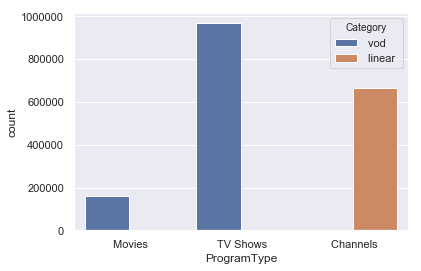

In [90]:
sns.countplot(x=vid_started['ProgramType'],hue=vid_started['Category'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020265B4D518>],
      dtype=object)

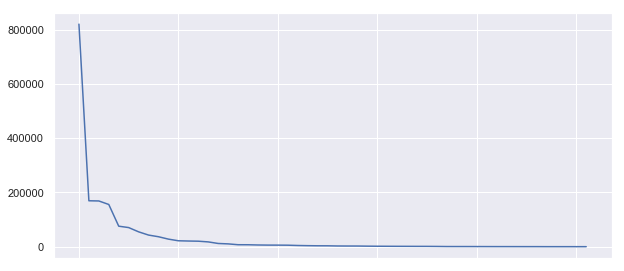

In [91]:
vid_started['Genre'].value_counts().plot(subplots=True, figsize=(10,5))


[Text(0, 0, 'Desktop'),
 Text(0, 0, 'Mobile'),
 Text(0, 0, 'Tablet'),
 Text(0, 0, 'TV')]

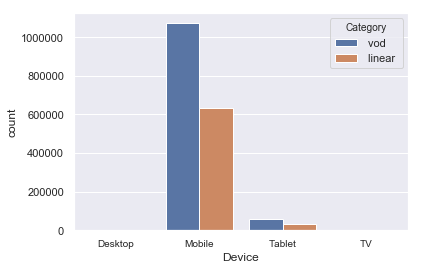

In [92]:
ax = sns.countplot(x=vid_started['Device'],hue=vid_started['Category'])
ax.set_xticklabels(['Desktop','Mobile','Tablet','TV'],rotation='horizontal',fontsize=10)

In [93]:
vid_started.OS.value_counts()

1    1485166
2     311315
0         44
Name: OS, dtype: int64

[Text(0, 0, 'Desktop'),
 Text(0, 0, 'Mobile'),
 Text(0, 0, 'Tablet'),
 Text(0, 0, 'TV')]

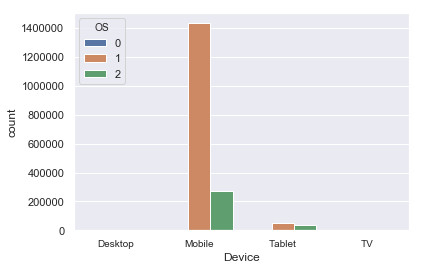

In [94]:
ax = sns.countplot(x=vid_started['Device'],hue=vid_started['OS'])
ax.set_xticklabels(['Desktop','Mobile','Tablet','TV'],rotation='horizontal',fontsize=10)


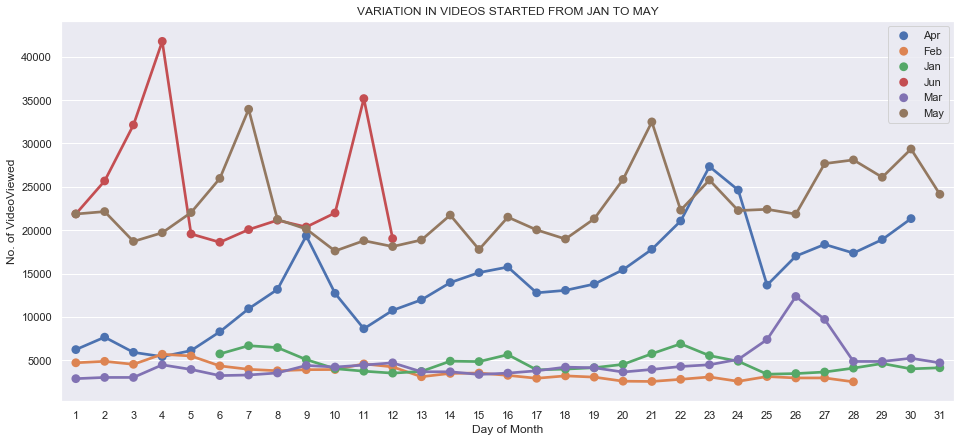

In [95]:
#Starting with date & time of day columns of VideoDetails data
#Splitting the date column into month & day
vid_started['Date'] = pd.to_datetime(vid_started['Date'],format="%Y%m%d")
vid_started['month'] = vid_started['Date'].dt.strftime('%b')
vid_started['day_of_month']= vid_started['Date'].dt.day

#Grouping by month & day, aggregating based on count of video started viewed for each day of each month
df_groupedby_month_and_day = vid_started.groupby(by=['month','day_of_month']).count().reset_index()

#Plotting the stacked line chart for each day of each month
plt.figure(figsize=(16, 7))
sns.pointplot(x="day_of_month", y="UserId", hue="month", data=df_groupedby_month_and_day)
plt.xlabel("Day of Month")
plt.ylabel("No. of VideoViewed")
plt.title("VARIATION IN VIDEOS STARTED FROM JAN TO MAY")
plt.legend(loc='upper right')

# Timestamp conversion for video started

In [101]:
vid_started['TimeStamp']= vid_started["Date"].astype(str)+" "+(vid_started['Minute_Of_Day']//60).astype(str) +":"+ (vid_started['Minute_Of_Day']%60).astype(str)+ ":"+vid_started["Second"].astype(str)

In [102]:
vid_started['TimeStamp']=pd.to_datetime(vid_started["TimeStamp"],format="%Y%m%d %H:%M:%S")
vid_started["TimeStamp"].head()

0   2017-01-06 00:00:08
1   2017-01-06 00:00:28
2   2017-01-06 00:00:36
3   2017-01-06 00:00:48
4   2017-01-06 00:00:56
Name: TimeStamp, dtype: datetime64[ns]

In [96]:
top_vid_st=vid_started.groupby(['VideoId'])['Minute_Of_Day'].sum().sort_values(ascending = False).head(10)
top_vid_st = pd.DataFrame({'VideoId':top_vid_st.index, 'Tot_Minutes':top_vid_st.values})
top_vid_st

,VideoId,Tot_Minutes
0,2dd067e7a439ac5a433bb7aa7eec6b7b,166151052
1,dc9fe110cd1b581f107da6cba56bb95d,74709640
2,d5b0a8692cbbe447fd9014382047ad66,71932613
3,e6ea7e407888ec088e91bafe475c91d0,57699126
4,1a729c215f0c08cc9fedb32bc272b556,52317700
5,ef2f8cc077424405c8d09031ad76ef92,36980109
6,a4a773531e35757badfe759f6d69e7a7,35261299
7,c1c28e3151b39245290365040a777475,25380852
8,5c0f1f6e255af1a4b8f61f778c0529bd,23242444
9,3be9d3729cf2391d5feecdea0f2c4c66,19969831


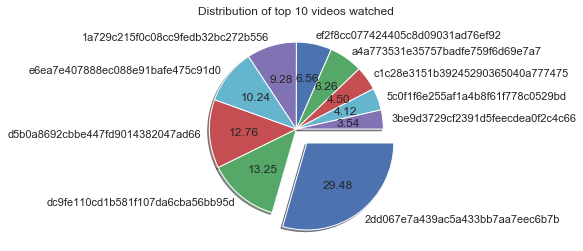

In [97]:
values = top_vid_st['Tot_Minutes']
colors = ['b', 'g', 'r', 'c', 'm']
explode = (0.2, 0, 0, 0, 0,0,0,0,0,0)
plt.pie(values, colors=colors,autopct ="%.2f", labels=top_vid_st['VideoId'],explode=explode,counterclock=False, shadow=True)
plt.title('Distribution of top 10 videos watched')
plt.show()

# Let's see how many active users Clever Tap Has

In [98]:
compl_user=registration_df[registration_df['Status']=='Completed']

## removing the unistalled users
active_users=pd.concat([compl_user,app_uninstalled_df]).drop_duplicates(subset = ['UserId','UserId'],keep=False)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [99]:
print('=====================================================')
print('Active user details')
print('=====================================================')
print ('Active User data has {} rows and {} columns'.format(active_users.shape[0],active_users.shape[1]))
print ('Number of Unique Active users = {} '.format(active_users['UserId'].nunique()))
print ('Number of Unique Countries of active users = {} '.format(active_users['Country'].nunique()))
print ('Number of States of active users= {} '.format(active_users['State'].nunique()))
print ('Number of Device of active users = {} '.format(active_users['Device'].nunique()))
print ('Number of OS used of active users= {} '.format(active_users['OS'].nunique()))
print ('Minium date of registration = {} '.format(active_users['Date'].min()))
print ('Maximum date of registration = {} '.format(active_users['Date'].max()))
print('=====================================================')


Active user details
Active User data has 214047 rows and 11 columns
Number of Unique Active users = 214047 
Number of Unique Countries of active users = 58 
Number of States of active users= 108 
Number of Device of active users = 4 
Number of OS used of active users= 3 
Minium date of registration = 2017-01-06 00:00:00 
Maximum date of registration = 2017-06-12 00:00:00 


# How many active users have started the videos

In [100]:
#vid_started.head()

act_user_vid = pd.merge(vid_started[['VideoId','Genre','ProgramType','UserId']], active_users, how='inner', on=['UserId'])
act_user_vid.head()



,VideoId,Genre,ProgramType,UserId,Country,Date,Device,Minute_Of_Day,OS,Second,State,Status,day_of_month,month
0,a4d9b88c7ed63d723c70b358a857719c,Anime,TV Shows,435d41ae019cb8db785483793859c9a8,1,2017-01-06,1,178,1,0,35,NaN,6,Jan
1,21526ec273ad7b6d230822f32d685fd1,Anime,TV Shows,ca601ff304bf0c0836f8a59f7751b8de,1,2017-01-18,1,141,1,0,35,NaN,18,Jan
2,2e47c28c5a2f4ac65315d0229447fdf8,Comedy,Movies,087c741c167a352d07822fcab58046e5,1,2017-02-09,1,1140,1,0,35,NaN,9,Feb
3,2e47c28c5a2f4ac65315d0229447fdf8,Comedy,Movies,087c741c167a352d07822fcab58046e5,1,2017-02-09,1,1140,1,0,35,NaN,9,Feb
4,2e47c28c5a2f4ac65315d0229447fdf8,Comedy,Movies,087c741c167a352d07822fcab58046e5,1,2017-02-09,1,1140,1,0,35,NaN,9,Feb


# UserId vs Genre counts

In [101]:
genre_user_counts=act_user_vid.groupby(['UserId', 'Genre']).size().unstack(fill_value=0)
genre_user_counts.head()

Genre,,Action,Adventure,Animation,Anime,Athletics,Automotive,Award Show,Badminton,Comedy,...,Special Event,Sports Magazine,TV Shows (General),Talk Show,Team Sports (Excl. Football),Tennis / Squash,Thriller,Travel,Variety,Wrestling
UserId,,,,,,,,,,,,,,,,,,,,,
000076c7bbdf7e4568777134cc4bec56,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
00016f6ad820aa24940343f837799519,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0002687e32b468bef8d9407f126f9d14,0,2,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,0
000338113b91b9848c7b69e909643f73,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0003b3d3ff23c9809845edcb631d5442,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# UserId vs ProgramType

In [102]:
progm_user_counts=act_user_vid.groupby(['UserId', 'ProgramType']).size().unstack(fill_value=0)
progm_user_counts.head()

ProgramType,Channels,Movies,TV Shows
UserId,,,
000076c7bbdf7e4568777134cc4bec56,2,1,6
00016f6ad820aa24940343f837799519,11,3,11
0002687e32b468bef8d9407f126f9d14,9,0,27
000338113b91b9848c7b69e909643f73,2,0,0
0003b3d3ff23c9809845edcb631d5442,0,1,1


# UserId vs Device


In [103]:
dev_user_counts=act_user_vid.groupby(['UserId', 'Device']).size().unstack(fill_value=0)
dev_user_counts.head()

Device,0,1,2,3
UserId,,,,
000076c7bbdf7e4568777134cc4bec56,0,9,0,0
00016f6ad820aa24940343f837799519,0,25,0,0
0002687e32b468bef8d9407f126f9d14,0,36,0,0
000338113b91b9848c7b69e909643f73,0,2,0,0
0003b3d3ff23c9809845edcb631d5442,0,2,0,0


# UserId vs OS

In [104]:
OS_user_counts=act_user_vid.groupby(['UserId', 'OS']).size().unstack(fill_value=0)
OS_user_counts.head()

OS,0,1,2
UserId,,,
000076c7bbdf7e4568777134cc4bec56,0,0,9
00016f6ad820aa24940343f837799519,0,0,25
0002687e32b468bef8d9407f126f9d14,0,0,36
000338113b91b9848c7b69e909643f73,0,2,0
0003b3d3ff23c9809845edcb631d5442,0,0,2


# Datewise videos watched by user


In [105]:
date_user_counts=act_user_vid.groupby(['UserId', 'Date']).size().unstack(fill_value=0)
date_user_counts.head()

Date,2017-01-06 00:00:00,2017-01-07 00:00:00,2017-01-08 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00,2017-01-11 00:00:00,2017-01-12 00:00:00,2017-01-13 00:00:00,2017-01-14 00:00:00,2017-01-15 00:00:00,...,2017-06-03 00:00:00,2017-06-04 00:00:00,2017-06-05 00:00:00,2017-06-06 00:00:00,2017-06-07 00:00:00,2017-06-08 00:00:00,2017-06-09 00:00:00,2017-06-10 00:00:00,2017-06-11 00:00:00,2017-06-12 00:00:00
UserId,,,,,,,,,,,,,,,,,,,,,
000076c7bbdf7e4568777134cc4bec56,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,9,0,0,0
00016f6ad820aa24940343f837799519,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0002687e32b468bef8d9407f126f9d14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000338113b91b9848c7b69e909643f73,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0003b3d3ff23c9809845edcb631d5442,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Active users launched the app

In [106]:
act_user_launch = pd.merge(df_applaunched, active_users[['UserId']], how='inner', on=['UserId'])
act_user_launch.head()


,UserId,Date,Minute_Of_Day,Second,State,Country,Device,OS,month,day_of_month
0,66d4abf4f3b733c27591b3f47c85eff7,2017-01-06,0,52,37,1,1,1,Jan,6
1,66d4abf4f3b733c27591b3f47c85eff7,2017-01-14,32,12,37,1,1,1,Jan,14
2,66d4abf4f3b733c27591b3f47c85eff7,2017-01-14,526,56,37,1,1,1,Jan,14
3,66d4abf4f3b733c27591b3f47c85eff7,2017-01-15,13,4,37,1,1,1,Jan,15
4,66d4abf4f3b733c27591b3f47c85eff7,2017-01-15,351,4,37,1,1,1,Jan,15


In [107]:
act_user_launch['Min_conv']=act_user_launch["Second"].apply(lambda x: round(x/60,2))
act_user_launch['Total_mins']=act_user_launch['Minute_Of_Day'] + act_user_launch['Min_conv']
act_user_launch['Hours_spent']=act_user_launch['Total_mins'].apply(lambda x: round(x/60,2))

act_user_launch.head()

,UserId,Date,Minute_Of_Day,Second,State,Country,Device,OS,month,day_of_month,Min_conv,Total_mins,Hours_spent
0,66d4abf4f3b733c27591b3f47c85eff7,2017-01-06,0,52,37,1,1,1,Jan,6,0.87,0.87,0.01
1,66d4abf4f3b733c27591b3f47c85eff7,2017-01-14,32,12,37,1,1,1,Jan,14,0.20,32.20,0.54
2,66d4abf4f3b733c27591b3f47c85eff7,2017-01-14,526,56,37,1,1,1,Jan,14,0.93,526.93,8.78
3,66d4abf4f3b733c27591b3f47c85eff7,2017-01-15,13,4,37,1,1,1,Jan,15,0.07,13.07,0.22
4,66d4abf4f3b733c27591b3f47c85eff7,2017-01-15,351,4,37,1,1,1,Jan,15,0.07,351.07,5.85


# what is the total hours spent in App Launch by each user


In [108]:
tot_user_hrs=act_user_launch.groupby(['UserId'])['Hours_spent'].sum().sort_values(ascending = False)
tot_user_hrs = pd.DataFrame({'UserId':tot_user_hrs.index, 'Tot_App_launch_hrs':tot_user_hrs.values})
tot_user_hrs.head()

,UserId,Tot_App_launch_hrs
0,5236bd045c6c38adbe77865007dd5fa7,116052.91
1,80e58582304624d86fd4b08c75b94e1b,86954.59
2,370cc8b74e6f40464552d3fd9f24435b,82504.30
3,ff0ff4667c924133200c34a7985a950a,79302.54
4,8eed2e642f05969451d179ec5bba9a68,62685.39
